In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np
from collections import Counter

In [2]:
data = pd.read_csv("data.csv", names=["gender", "height", "weight"])
df = pd.DataFrame(data)
df = df.drop([0, 1])

In [3]:
df

,gender,height,weight
2,Male,73.84701701751,241.893563180437
3,Male,74.110105391784,212.7408555565
4,Male,71.730978403337,220.04247030307
5,Male,69.881795861115,206.349800623871
6,Male,67.253015687806,152.212155757083
...,...,...,...
9996,Female,66.172652147770,136.77745418323
9997,Female,67.06715464905,170.86790589071
9998,Female,63.867992213757,128.47531878412
9999,Female,69.034243130734,163.85246134657


In [4]:
s = 5000
male = df[df.index<s]
female = df[df.index >= s]

In [5]:
male

,gender,height,weight
2,Male,73.84701701751,241.893563180437
3,Male,74.110105391784,212.7408555565
4,Male,71.730978403337,220.04247030307
5,Male,69.881795861115,206.349800623871
6,Male,67.253015687806,152.212155757083
...,...,...,...
4995,Male,73.092870822603,193.94418060613
4996,Male,68.860062472344,177.13105215994
4997,Male,68.97342283364,159.28522822353
4998,Male,67.013794968193,199.19540007666


In [6]:
female

,gender,height,weight
5000,Male,70.351879878634,198.90301194415
5001,Female,58.910732037012,102.08832636784
5002,Female,65.230012507712,141.30582260142
5003,Female,63.369003758413,131.04140269299
5004,Female,64.479997425608,128.17151122163
...,...,...,...
9996,Female,66.172652147770,136.77745418323
9997,Female,67.06715464905,170.86790589071
9998,Female,63.867992213757,128.47531878412
9999,Female,69.034243130734,163.85246134657


In [7]:
m_height = male['height']
m_weight = male['weight']
f_height = female['height']
f_weight = female['weight']

In [8]:
class KNNClassifier:
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def _distance(self, a, b):
        a = np.array(a, dtype=float)
        b = np.array(b, dtype=float)
        return np.linalg.norm(a - b)
    
    def predict(self, input_, k):
        # Make sure the data is in a float format instead of strings
        x = np.array(self.x, dtype=float)
        
        # Combine together x and y data into one list of tuples
        xy = list(zip(x, self.y))
        
        # Add distance to each tuple.
        # But what distance is the correct type of distance?
        xy_dist = [(x, y, self._distance(x, input_)) for (x, y) in xy]
        
        # Sort by the distance element in the tuple.
        xy_sorted = sorted(xy_dist, key=lambda x: x[2])
        
        # Pull out the class names from the tuples.
        classes = [i[1] for i in xy_sorted]
        
        # Count the most frequent class,
        c = Counter(classes[:k])

        # Use list comprehension to grab the class from the counter.
        most_common_class = c.most_common(1)[0][0]
        
        return most_common_class

In [9]:
m_df = pd.DataFrame(male)
f_df = pd.DataFrame(female)

In [10]:
list(m_df.columns)

['gender', 'height', 'weight']

In [11]:
m_df = m_df.astype({'height': 'float'})
m_df = m_df.astype({'weight': 'float'})
f_df = f_df.astype({'height': 'float'})
f_df = f_df.astype({'weight': 'float'})

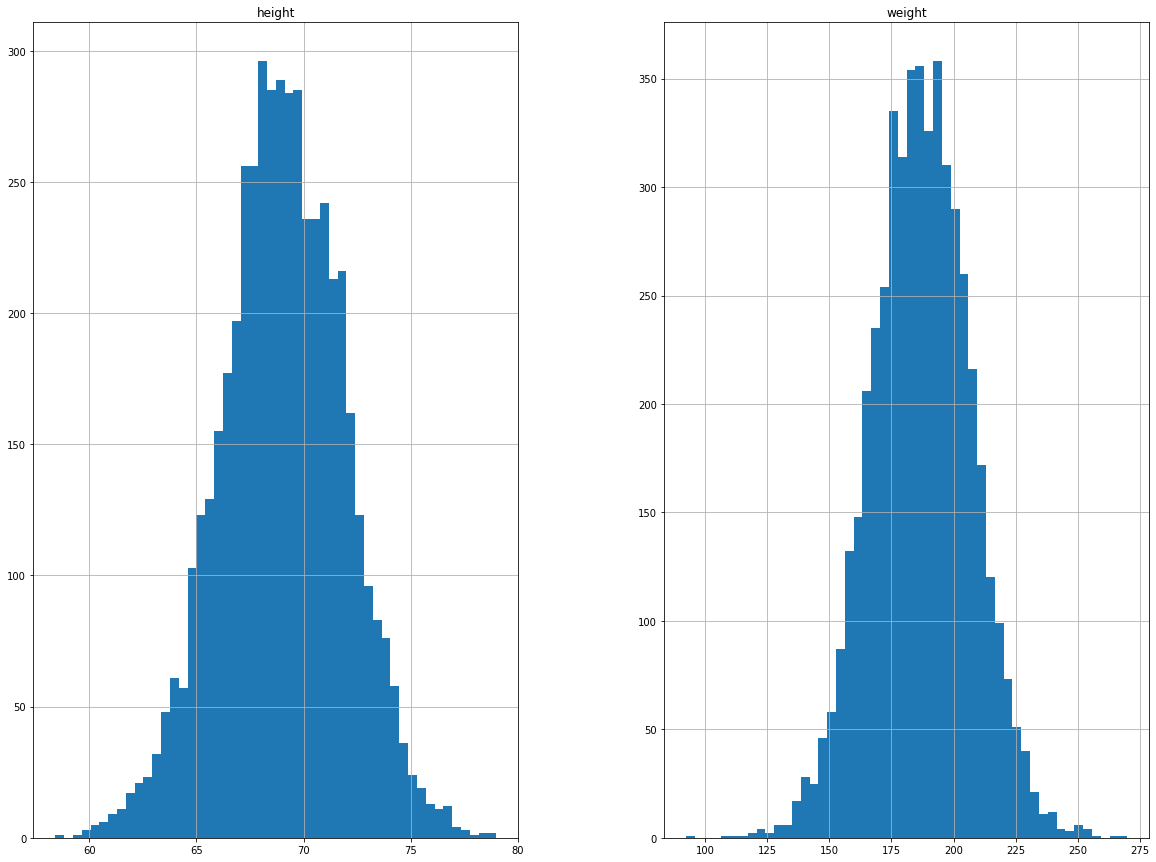

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
m_df.hist(bins=50, figsize=(20,15))
plt.show()

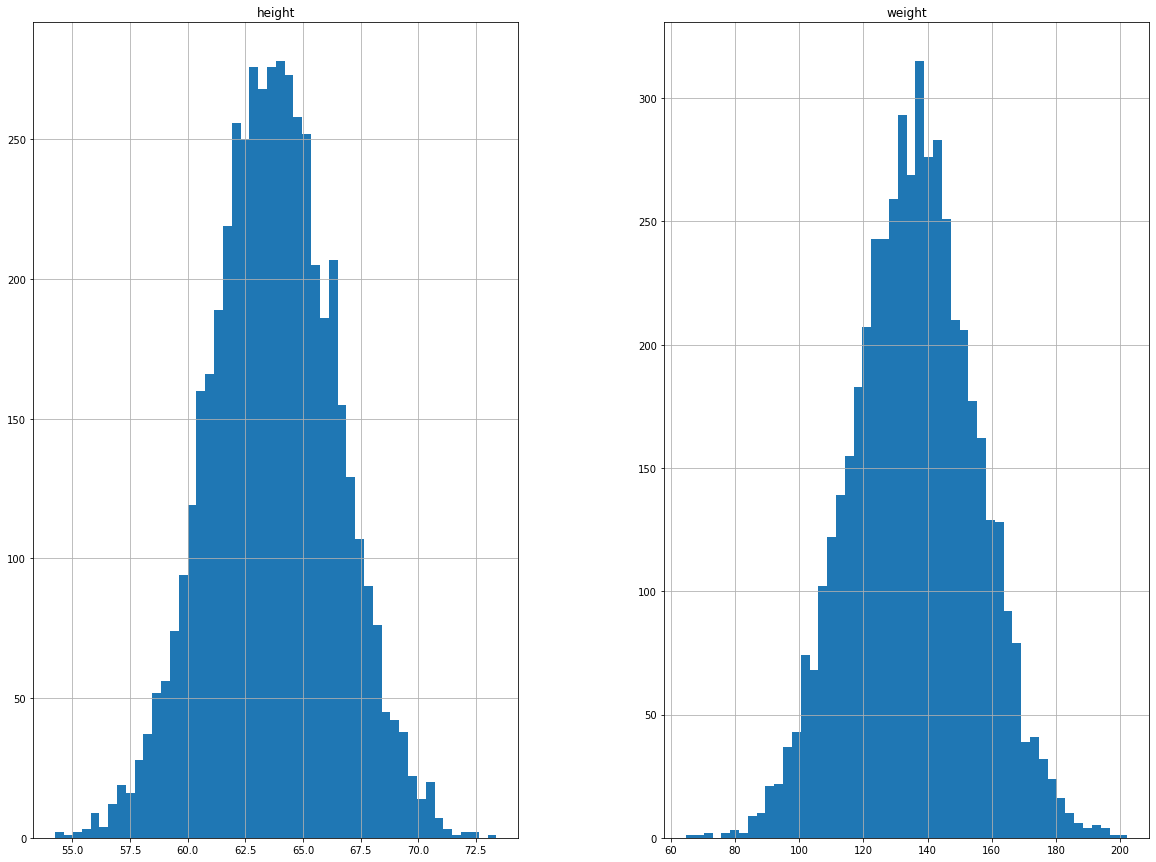

In [13]:
f_df.hist(bins=50, figsize=(20,15))
plt.show()

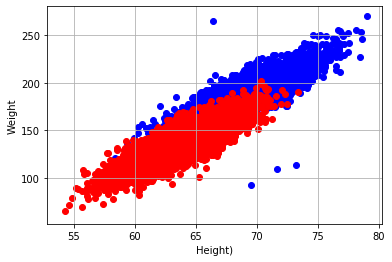

In [14]:
%matplotlib inline 
plt.scatter(m_df['height'], m_df['weight'], color='b')
plt.scatter(f_df['height'],f_df['weight'], color='r')
plt.xlabel('Height)')
plt.ylabel('Weight')
plt.grid(True)
plt.show();

In [15]:
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
# train_set, test_set = split_train_test(df, 0.2)

In [17]:
# train_set.to_csv('train')
# test_set.to_csv('test')

In [18]:
train_data = pd.read_csv("train", names=["gender", "height", "weight"])
train_data = pd.DataFrame(train_data)

In [19]:
train_data

,gender,height,weight
5640,Female,66.766157,152.944405
8220,Female,63.881197,137.170886
2415,Male,68.720243,182.455923
7442,Female,62.834020,132.169244
3182,Male,70.962617,195.017206
...,...,...,...
2866,Male,68.932069,187.626609
4579,Male,64.746174,176.948433
4056,Male,69.741240,206.636440
7843,Female,62.536789,128.357712


In [20]:
x_height = train_data['height']
y_weight = train_data['weight']
label = train_data['gender']
clf = KNNClassifier()

In [21]:
x_height

5640    66.766157
8220    63.881197
2415    68.720243
7442    62.834020
3182    70.962617
          ...    
2866    68.932069
4579    64.746174
4056    69.741240
7843    62.536789
5928    62.196274
Name: height, Length: 8000, dtype: float64

In [22]:
y_weight

5640    152.944405
8220    137.170886
2415    182.455923
7442    132.169244
3182    195.017206
           ...    
2866    187.626609
4579    176.948433
4056    206.636440
7843    128.357712
5928    120.008199
Name: weight, Length: 8000, dtype: float64

In [23]:
clf.fit(x_height, label)

In [24]:
clf.y

5640    Female
8220    Female
2415      Male
7442    Female
3182      Male
         ...  
2866      Male
4579      Male
4056      Male
7843    Female
5928    Female
Name: gender, Length: 8000, dtype: object

In [25]:
clf._distance(x_height.iloc[0], x_height.iloc[1])

2.884960096907996

In [26]:
clf.predict(x_height, 5)

'Female'

In [27]:
# for k in range(1, 10):
#     print(f"K is equal to {k}")
# k = 5
# for i in range(len(x_height)):
#     print(clf.predict(x_height.iloc[i], k))

In [44]:
def test_k(k, x_values):
    correct = 0
    correct_m = 0
    correct_f = 0
    incorrect = 0
    
    for i in range(len(x_values)):
        real_label = train_data.iloc[0][0]
        prediction = clf.predict(x_values.iloc[i], k)
        if prediction == real_label:
#             print('correct')
            correct += 1
            if prediction == 'Male':
                correct_m += 1
            elif prediction == 'Female':
                correct_f += 1
        else:
#             print('incorrect')
            incorrect += 1
            
    print('correct', + correct)
    print('correct_m', + correct_m)
    print('correct_f', + correct_f)
    print('incorrect', + incorrect)

In [45]:
test_k(1, x_height)

correct 4003
correct_m 0
correct_f 4003
incorrect 3997
